# Topics of Sociability and Solidarity in Recollections of *All* Survivors of Auschwitz-Birkenau

### Research Questions:

- If one watches testimonies of Birkenau survivors for long, what is the probability that she hears survivors speaking about solidarity and sociability? Are they frequent and recurrent elements of survivors' recollections? Or are they rare topics and survivors rather focus their attention on other topics?
- Compared to the probability of other rare or frequent events in Birkenau, are topics related to solidarity and sociability more or less probable in the narration of survivors?

## Load the relevant data

Load the libraries needed to work with the data

In [110]:
import constants
import pandas as pd
import os
from IPython.display import display
%config Completer.use_jedi = False
import networkx as nx
import pyemma

In [119]:
def measure_centrality(pm_model,state_index,centrality_measure_type):
    P = pm_model.P
    gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
    if centrality_measure_type == "degree":
        centrality = nx.degree_centrality(gP)
    elif (centrality_measure_type=="closeness"):
        centrality = nx.closeness_centrality(gP)
    return centrality


Set up the paths to data

In [112]:
input_directory = constants.output_data_markov_modelling

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

Load the stationary probability of different topics in the recollections of survivors

In [113]:
p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')
pm_model = pyemma.load('output/markov_modelling/complete'+'/'+'pyemma_model','simple')
state_index = pd.read_csv('output/markov_modelling/complete/state_index.csv')

Use the line below for normalization

In [114]:
p_complete['stationary_prob_normalized'] = p_complete[p_complete.topic_name=='selections']['stationary_prob'].values[0] / p_complete['stationary_prob']

In [115]:
p_complete['stationary_prob_normalized_to_escape'] =  p_complete['stationary_prob']/p_complete[p_complete.topic_name=='escapes']['stationary_prob'].values[0]

In [116]:
p_complete['stationary_prob_normalized_to_escape'].describe()

count    103.000000
mean       2.642343
std        4.273325
min        0.018361
25%        0.220480
50%        0.906628
75%        2.443872
max       25.942877
Name: stationary_prob_normalized_to_escape, dtype: float64

In [117]:
p_complete['stationary_prob_normalized'].describe()

count    103.000000
mean      92.204357
std      175.470420
min        0.635907
25%        6.751782
50%       18.196288
75%       74.973173
max      898.504039
Name: stationary_prob_normalized, dtype: float64

Show the 25 most significant topics

In [129]:
cent = measure_centrality(pm_model,state_index,'closeness')
state_index['centrality'] = list(cent.values())
state_index

,Unnamed: 0,KeywordLabel,centrality
0,0,Appell,0.850000
1,1,German concentration camps,0.693878
2,2,Holocaust faith issues,0.708333
3,3,International Red Cross,0.589595
4,4,Jewish identity,0.600000
...,...,...,...
98,98,transportation,0.842975
99,99,trials,0.548387
100,100,twins,0.703448
101,101,violence,0.886957


In [145]:
state_index.sort_values('centrality',ascending=False)[0:19]


,Unnamed: 0,KeywordLabel,centrality
60,60,living conditions,0.944444
19,19,camp population,0.927273
70,70,perpetrators,0.918919
7,7,aid giving,0.918919
87,87,selections,0.910714
97,97,transfer,0.910714
6,6,adaptation methods,0.910714
47,47,forced labor,0.902655
41,41,family,0.894737
55,55,kapos,0.894737


In [118]:
display(p_complete[0:25])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
0,0,living conditions,0.095322,0.635907,25.942877
1,1,camp procedures,0.064109,0.945512,17.447982
2,2,selections,0.060616,1.000000,16.497270
3,3,food and thirst,0.046198,1.312095,12.573233
4,4,forced labor,0.044597,1.359189,12.137582
5,5,mass murder,0.041065,1.476099,11.176264
6,6,perpetrators,0.036365,1.666886,9.897059
7,7,camp population,0.035346,1.714911,9.619898
8,8,kapos,0.033621,1.802925,9.150282
9,9,family,0.033184,1.826644,9.031464


## Identify relevant topics

### Identify the facto significant and everyday events

Identify "selection"

In [67]:
selection = p_complete[p_complete.topic_name=='selections']['stationary_prob'].values[0]

Identify "Appell"

In [68]:
Appell = p_complete[p_complete.topic_name=='Appell']['stationary_prob'].values[0]

Identify "clothes"

In [69]:
clothes = p_complete[p_complete.topic_name=='clothing']['stationary_prob'].values[0]

Identify "tattoo"

In [70]:
tattoo = p_complete[p_complete.topic_name=='tattoo']['stationary_prob'].values[0]

### Identify the facto rare events

In [71]:
escapes = p_complete[p_complete.topic_name=='escapes']['stationary_prob'].values[0]

### Identify topics related to sociability

Identify the topic relating to social relations

In [72]:
social_bonds = p_complete[p_complete.topic_name=='social bonds']['stationary_prob'].values[0]

In [73]:
#friends = p_complete[p_complete.topic_name=='friends']['stationary_prob'].values[0]

### Identify topics related to acts of solidarity

In [74]:
aid_giving = p_complete[p_complete.topic_name=='aid giving']['stationary_prob'].values[0]

In [75]:
#food_sharing = p_complete[p_complete.topic_name=='food sharing']['stationary_prob'].values[0]

## Observation 1

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is more probable than "tattoos"; yet is the 13th most probable topic. It is therefore part of the upper quartile that contains the most probable topics addressed by survivors.

### Quantitative evidence

In [76]:
print (aid_giving)

0.0265390828510051


In [77]:
print (selection/aid_giving)

2.284018924198013


In [78]:
display(p_complete[p_complete.topic_name=='aid giving'])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
13,13,aid giving,0.026539,2.284019,7.222913


In [79]:
print (tattoo)

0.0275466731806716


In [80]:
print (aid_giving/tattoo)

0.9634224313383335


In [81]:
upper_quantile = p_complete.stationary_prob.quantile([0.75]).values[0]
print (upper_quantile)

0.0089794972230464


In [82]:
print (aid_giving>upper_quantile)

True


## Observation 2

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is significantly more probable
(20 times) than "Escape".

### Quantitative evidence

In [83]:
print (aid_giving)

0.0265390828510051


In [84]:
print (escapes)

0.0036742908433864


In [85]:
print (aid_giving/escapes)

7.222912932647821


## Observation 3

### Qualitative description:

The topic describing various forms of social activity ("social relations") is more significant than tattoo; it is the 17th most probable topic, and it is also part of the upper quartile. It is also more probable (18 times) than escapes .

### Quantitative evidence

In [86]:
print (social_bonds)

0.017360374959271


In [87]:
display(p_complete)

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
0,0,living conditions,0.095322,0.635907,25.942877
1,1,camp procedures,0.064109,0.945512,17.447982
2,2,selections,0.060616,1.000000,16.497270
3,3,food and thirst,0.046198,1.312095,12.573233
4,4,forced labor,0.044597,1.359189,12.137582
...,...,...,...,...,...
98,98,prison experience,0.000107,563.933910,0.029254
99,99,discussions,0.000104,584.695656,0.028215
100,100,collaborators,0.000096,631.365568,0.026130
101,101,chilren,0.000087,693.880959,0.023775


In [88]:
print (social_bonds/Appell)

0.7115722158647592


In [89]:
print (social_bonds/tattoo)

0.630216754139737


In [90]:
print (selection/social_bonds)

3.491616258563806


In [91]:
print (social_bonds>upper_quantile)

True


In [92]:
print (social_bonds/escapes)

4.724823292233137


## Observation 4

### Qualitative description:

The topic describing sociability is more significant (1.5 times) than memories related to clothes. Similarly, the topic describing acts of solidarity is more significant (1.7 times) than memories related to clothes.

# Comments
## Tim
- 1.2 is a low number, it would be important to know that it's actually  significant

## Gabor
- should we just say that "topic describing sociability is slightly more probable as topic indicating memories related to clothes", ie. leave out significance?
- alternatively, someone suggested this method to resolve this problem: https://thomasleeper.com/Rcourse/Tutorials/permutationtests.html

### Quantitative evidence

In [93]:
social_bonds/clothes

1.087265717700284

In [94]:
display(p_complete[p_complete.topic_name=="clothing"])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
18,18,clothing,0.015967,3.796315,4.345601


In [95]:
display(p_complete[p_complete.topic_name=="social bonds"])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
17,17,social bonds,0.01736,3.491616,4.724823


In [96]:
aid_giving/clothes

1.6621204916830346

## Observation 5

### Qualitative description:

The topic describing friendship is 5 times more significant than escapes. Selection is 15 times more significant than friends.

### Quantitative evidence

print (friends)

print (friends/escapes)

print (selection/friends)

## Observation 6

### Qualitative description:

The topic describing friendship is 5 times more significant than escapes. Selection is 15 times more significant than friends.

### Quantitative evidence

print (food_sharing)

print (food_sharing/escapes)

print (selection/food_sharing)

## Interpretation

In the recollections of survivors of Birkenau, memories related to sociability and acts of solidarity are highly probable and recurrent topics. They do recur in the narrations of many victims independently from each other. Survivors speak about them as often as about other everyday aspects and events of life in Birkenau. This suggests that neither sociability nor acts of solidarity were rare events in Birkenau. If they had been rare and sporadic, survivors would not have addressed them very often in their recollections either. They would discuss these topics as often as topics related to de facto rare events such as for instance escape. 

It is important to underline that survivors were not asked by interviewers to address solidarity and sociability. It was their decision to address these topics. The stationary probability measured above actually describe the overall probability that interviews with survivors go towards these topics.

Nevertheless this interpretation raises two questions to be addressed in the Discussion part:
- The fact that survivors recall occasions of solidarity or sociability does not indicate that they were frequent events in the past; they are just frequent in their memories
- They might recall them because they are always salient aspects of human life and not because they were frequent elements of everyday life in Birkenau


## Visualization

A word cloud rendering the stationary probability of key topics in recollections of Birkenau survivors. 

In [97]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [98]:
p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

In [99]:
#p_complete['stationary_prob_normalized'] = 1/(p_complete[p_complete.topic_name=='living conditions']['stationary_prob'].values[0] / p_complete['stationary_prob']) 
p_complete =  p_complete.append(p_complete[p_complete.topic_name=='escapes'])
wfreqs = p_complete.set_index('topic_name')['stationary_prob'].to_dict()

In [100]:
def black(word, font_size, position, orientation,
    font_path, random_state):
    if (word =="social bonds") or (word =="aid giving") or (word =="friends") or (word =="food sharing"):
        return 'red'
    elif (word =="tattoo") or (word =="clothing") or (word == "escapes"):
        return 'blue'
    else:
        return 'black'

In [147]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', color_func=black,
                min_font_size = 10).generate_from_frequencies(wfreqs)

In [102]:
wordcloud.font_path

'/miniconda3/envs/au_env/lib/python3.7/site-packages/wordcloud/DroidSansMono.ttf'

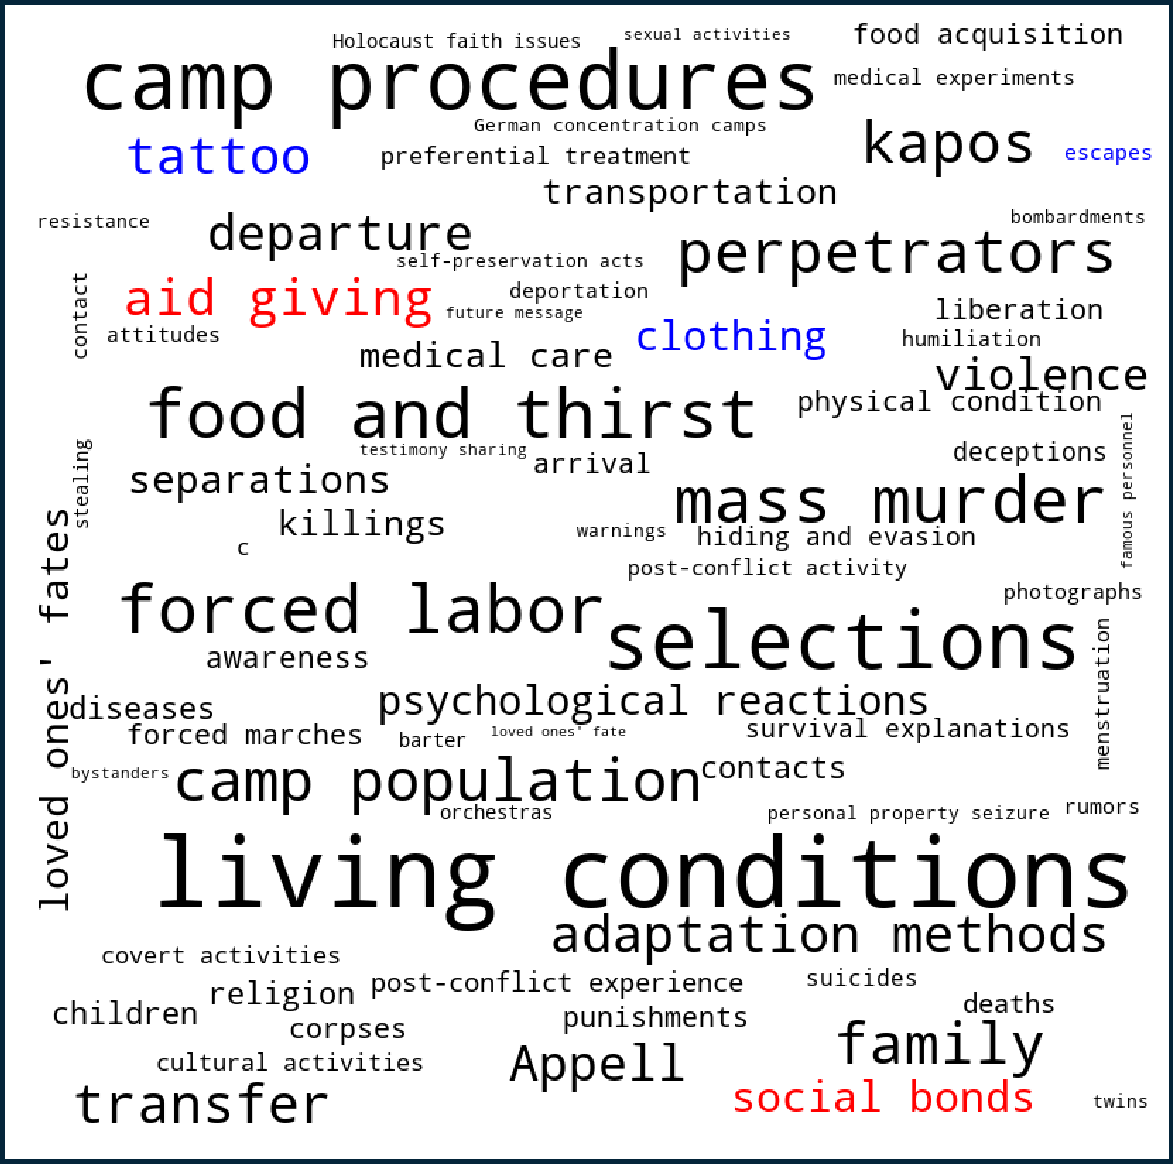

In [148]:
# plot the WordCloud image
fig, ax = plt.subplots(1, 1, figsize=(16, 16), facecolor=None,edgecolor="#04253a",linewidth=10)
ax.imshow(wordcloud)
ax.axis("off")
fig.tight_layout(pad=0.1)
fig.savefig("Figure_1.png",edgecolor=fig.get_edgecolor())